<a href="https://colab.research.google.com/github/fabiansep/TalentOps/blob/main/m2_e7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Configuración profesional de Matplotlib
plt.style.use('seaborn-v0_8')
mpl.rcParams.update({
    'font.size': 11,
    'figure.figsize': (10, 6),
    'figure.dpi': 100,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'axes.grid': True,
    'grid.alpha': 0.3
})

# Paleta de colores corporativa
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

print("Configuración de Matplotlib completada")

Configuración de Matplotlib completada


In [3]:
# Generar dataset de ventas empresariales
np.random.seed(42)
n_ventas = 1000

df = pd.DataFrame({
    'fecha': pd.date_range('2024-01-01', periods=n_ventas, freq='D'),
    'producto': np.random.choice(['Producto A', 'Producto B', 'Producto C', 'Producto D'], n_ventas),
    'region': np.random.choice(['Norte', 'Sur', 'Este', 'Oeste'], n_ventas),
    'cantidad': np.random.randint(1, 20, n_ventas),
    'precio_unitario': np.random.uniform(50, 500, n_ventas).round(2),
    'cliente_tipo': np.random.choice(['Regular', 'Premium', 'VIP'], n_ventas, p=[0.6, 0.3, 0.1])
})

# Calcular métricas derivadas
df['total_venta'] = df['cantidad'] * df['precio_unitario']
df['mes'] = df['fecha'].dt.month
df['dia_semana'] = df['fecha'].dt.day_name()

print(f"Dataset creado: {len(df)} registros")
print(f"Período: {df['fecha'].min()} a {df['fecha'].max()}")
print(f"Total ventas: ${df['total_venta'].sum():,.2f}")

Dataset creado: 1000 registros
Período: 2024-01-01 00:00:00 a 2026-09-26 00:00:00
Total ventas: $2,777,508.39


/tmp/ipython-input-833905584.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot(productos.values, labels=productos.index, patch_artist=True)



Análisis univariado guardado como 'analisis_univariado_empresarial.png'


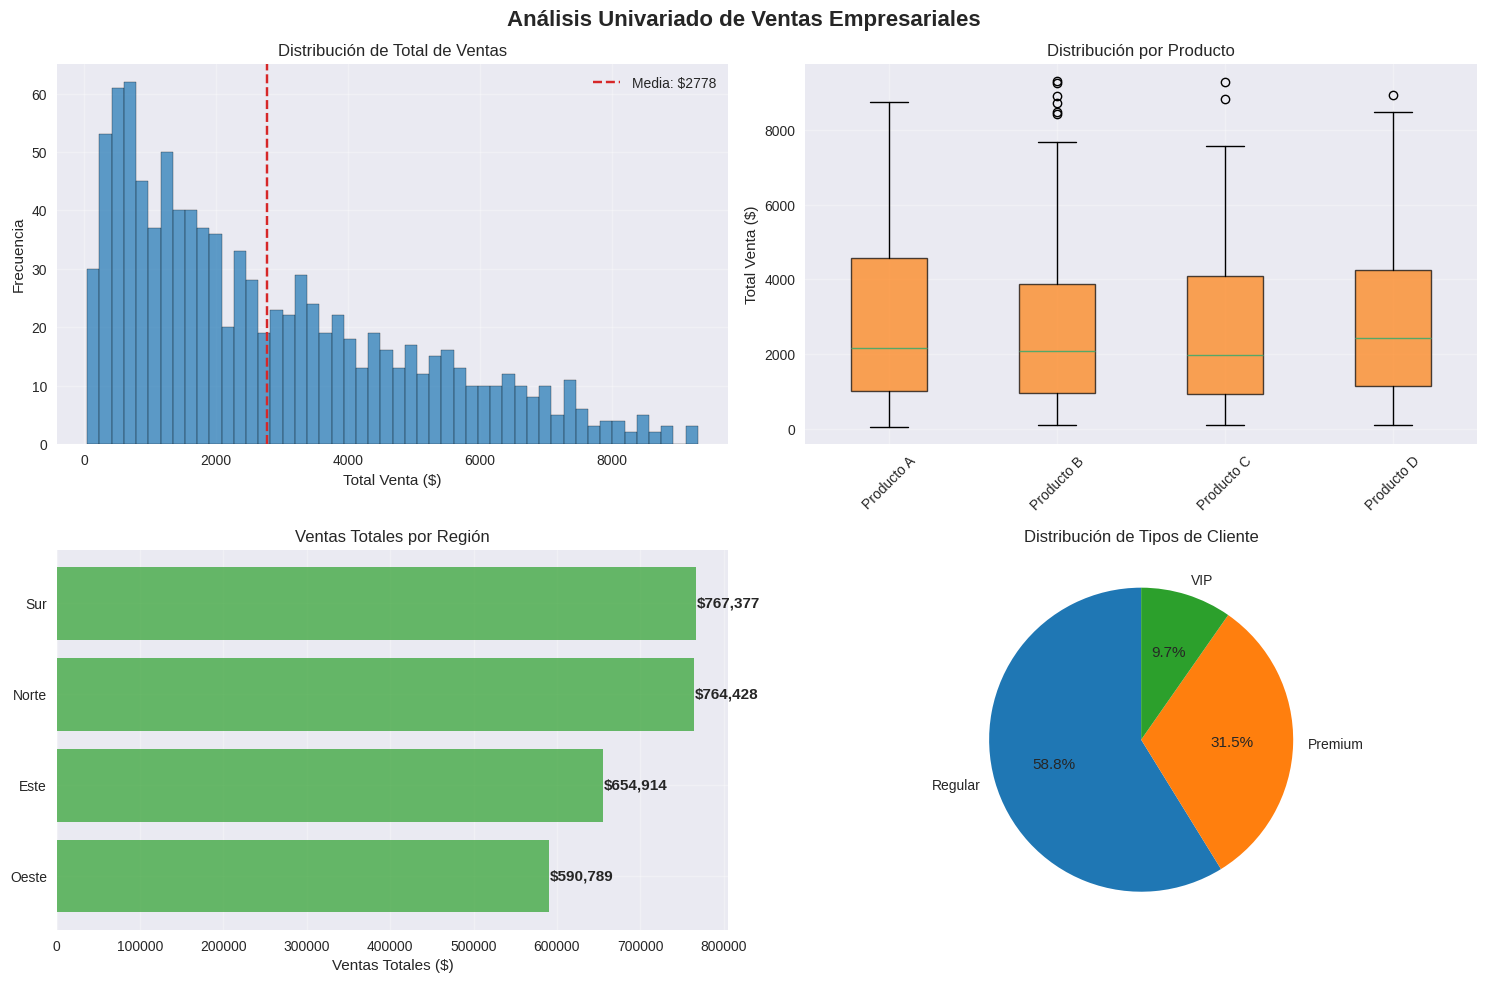

In [4]:
# Figura con múltiples análisis univariados
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Análisis Univariado de Ventas Empresariales', fontsize=16, fontweight='bold')

# 1. Histograma de total de ventas
ax1.hist(df['total_venta'], bins=50, alpha=0.7, color=colores[0], edgecolor='black')
ax1.set_title('Distribución de Total de Ventas')
ax1.set_xlabel('Total Venta ($)')
ax1.set_ylabel('Frecuencia')
ax1.axvline(df['total_venta'].mean(), color=colores[3], linestyle='--',
            label=f'Media: ${df["total_venta"].mean():.0f}')
ax1.legend()

# 2. Box plot por producto
productos = df.groupby('producto')['total_venta'].apply(list)
bp = ax2.boxplot(productos.values, labels=productos.index, patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor(colores[1])
    patch.set_alpha(0.7)
ax2.set_title('Distribución por Producto')
ax2.set_ylabel('Total Venta ($)')
ax2.tick_params(axis='x', rotation=45)

# 3. Gráfico de barras por región
ventas_region = df.groupby('region')['total_venta'].sum().sort_values(ascending=True)
bars = ax3.barh(ventas_region.index, ventas_region.values, color=colores[2], alpha=0.7)
ax3.set_title('Ventas Totales por Región')
ax3.set_xlabel('Ventas Totales ($)')
for i, (region, venta) in enumerate(zip(ventas_region.index, ventas_region.values)):
    ax3.text(venta + 1000, i, f'${venta:,.0f}', va='center', fontweight='bold')

# 4. Pie chart de tipos de cliente (con precaución)
cliente_counts = df['cliente_tipo'].value_counts()
wedges, texts, autotexts = ax4.pie(cliente_counts.values, labels=cliente_counts.index,
                                   autopct='%1.1f%%', colors=colores[:3], startangle=90)
ax4.set_title('Distribución de Tipos de Cliente')

plt.tight_layout()
plt.savefig('analisis_univariado_empresarial.png', dpi=300, bbox_inches='tight')
print("\nAnálisis univariado guardado como 'analisis_univariado_empresarial.png'")

Análisis bivariado guardado como 'analisis_bivariado_empresarial.png'


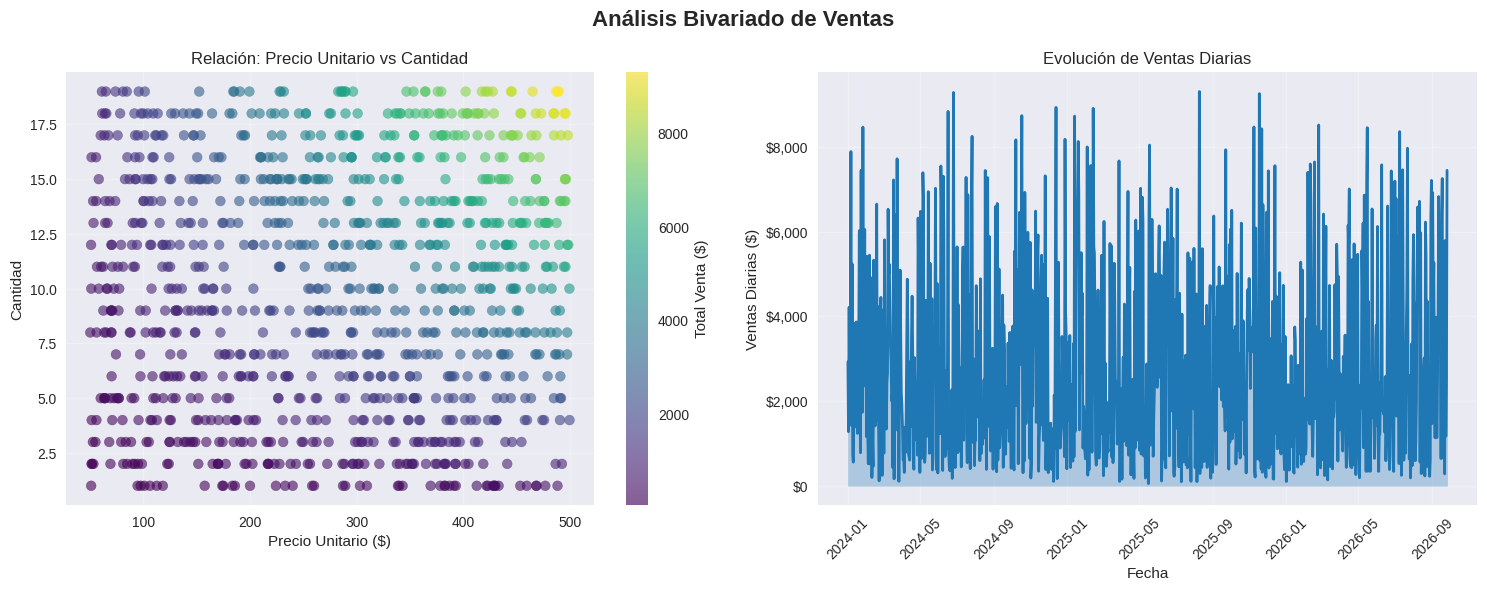

In [5]:
# Figura para análisis bivariado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Análisis Bivariado de Ventas', fontsize=16, fontweight='bold')

# 1. Scatter plot: cantidad vs precio unitario
scatter = ax1.scatter(df['precio_unitario'], df['cantidad'],
                     c=df['total_venta'], cmap='viridis', alpha=0.6, s=50)
ax1.set_title('Relación: Precio Unitario vs Cantidad')
ax1.set_xlabel('Precio Unitario ($)')
ax1.set_ylabel('Cantidad')
plt.colorbar(scatter, ax=ax1, label='Total Venta ($)')

# 2. Serie temporal de ventas diarias
ventas_diarias = df.groupby('fecha')['total_venta'].sum()
ax2.plot(ventas_diarias.index, ventas_diarias.values, color=colores[0], linewidth=2)
ax2.fill_between(ventas_diarias.index, ventas_diarias.values, alpha=0.3, color=colores[0])
ax2.set_title('Evolución de Ventas Diarias')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Ventas Diarias ($)')
ax2.tick_params(axis='x', rotation=45)

# Formatear eje Y
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

plt.tight_layout()
plt.savefig('analisis_bivariado_empresarial.png', dpi=300, bbox_inches='tight')
print("Análisis bivariado guardado como 'analisis_bivariado_empresarial.png'")